# Examen Parcial - Analitica de datos
## Duvan Diaz - Angela Remolina

Usando la base de datos de cancer de mama disponible en:
https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic) realizar un
modelo de regresión logística que permita categorizar correctamente los registros entre
pacientes sanos y no sanos. Para ello se debe seguir las siguientes indicaciones:
1. Se debe visualizar relaciones entre variables usando los métodos vistos en clase.
2. Encontrar valores atípicos o faltantes entre las columnas de los registros. En caso de
que existan, cuantificarlos (contarlos) para conocer el número total de ellos.
3. Encontrar los índices de los atípicos (si existen) y cuantificar cuántos registros
contienen estos tipos de datos. NOTA: es diferente encontrar el número total vs el
número de registros. Por ejemplo: Únicamente la fila 7 tiene un atípico en la columna
7,10 y 15. Del anterior ejemplo podemos afirmar que un registro contiene 3 datos
atípicos y para solucionar dicho problema el proceso que debemos seguir es
eliminar dicho registro.
4. En caso que la cantidad de registros que se eliminarían supera el 40 % del total del
conjunto de datos, se procederá a eliminar únicamente el 20 % de forma aleatoria
los registros atípicos.
5. El modelo debe ser validado por una validación cruzada con K=10. Dicho proceso
debe ser programado de manera manual, es decir NO SE PERMITE LAS
LIBRERÍAS EXTERNAS. NOTA: DEBEN GARANTIZAR LA HOMOGENEIDAD DE
LOS DATOS AL MOMENTO DE ENTRENAR EL MODELO.
6. Se debe imprimir la matriz de confusión por cada validación del numeral anterior.
7. El desempeño de este modelo debe ser encontrado al calcular las métricas de
sensibilidad, especificidad y precisión.
8. Deben desarrollar al menos 4 modelos diferentes en busca del mejor desempeño
posible(Se debe evidenciar la numerosas pruebas realizadas) y decidir en base de
una curva ROC cual de ellos es el mejor.

NOTA 1: CADA MODELO NO DEBE SUPERAR MÁS DE 7 ENTRADAS.

NOTA 2: Se debe entregar un notebook o paper que se evidencia todo lo realizado
aquí. El código debe estar debidamente comentado.

NOTA 3: El parcial se entregará el LUNES 20 de marzo del 2023 en parejas

In [101]:
# Paquetes de importacion y manejo de datos
import pandas as pd
import numpy as np

In [38]:
df = pd.read_csv('cancer_mama.csv')
nombre_columnas = ['ID','clas']
for i in range(1,31):
    nombre_columnas.append('x'+str(i))
df.columns = nombre_columnas
df

,ID,clas,x1,x2,x3,x4,x5,x6,x7,x8,...,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.5355,0.1741,0.3985,0.12440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
564,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
565,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
566,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


### Identificación y trato de datos atípicos

Se realiza el siguiente método para eliminar los registros que tengan `NaN`

In [39]:
df = df.dropna(axis=0)
df

,ID,clas,x1,x2,x3,x4,x5,x6,x7,x8,...,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.5355,0.1741,0.3985,0.12440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
564,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
565,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
566,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


Se verifica que no hayan datos diferentes a `Maligno (M)` y `Benigno (B)` en la columna de clasificación.

In [40]:
df.clas.unique()

array(['M', 'B'], dtype=object)

Para cuantificar estos valores, se le asigna a Maligno(M) el valor de 0 y a Benigno(B) el valor de 1

In [41]:
df['clasN'] = np.where(df['clas']== 'M', 0, 1)
df

,ID,clas,x1,x2,x3,x4,x5,x6,x7,x8,...,x22,x23,x24,x25,x26,x27,x28,x29,x30,clasN
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.17910,0.52490,0.5355,0.1741,0.3985,0.12440,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
564,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
565,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
566,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


El dataset sigue del mismo tamaño lo que significa que no existen datos `NaN`

A continuación, se verifica el tipo de datos de las columnas

In [42]:
df.dtypes

ID         int64
clas      object
x1       float64
x2       float64
x3       float64
x4       float64
x5       float64
x6       float64
x7       float64
x8       float64
x9       float64
x10      float64
x11      float64
x12      float64
x13      float64
x14      float64
x15      float64
x16      float64
x17      float64
x18      float64
x19      float64
x20      float64
x21      float64
x22      float64
x23      float64
x24      float64
x25      float64
x26      float64
x27      float64
x28      float64
x29      float64
x30      float64
clasN      int32
dtype: object

Se grafican boxplots para identificar los datos aítipicos.

C:\Users\Angela\AppData\Local\Temp\ipykernel_19876\3395015872.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plot.subplots()


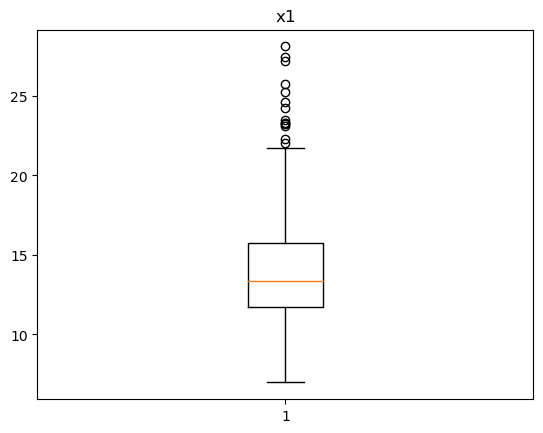

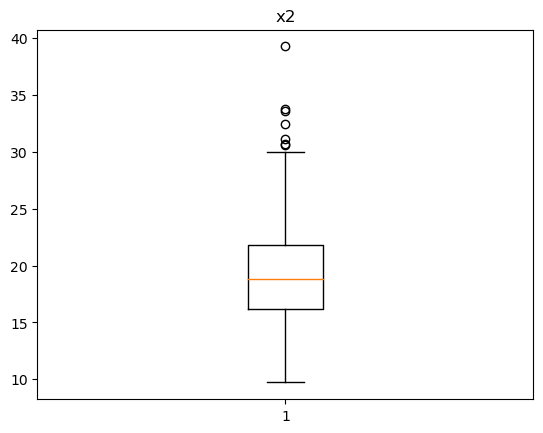

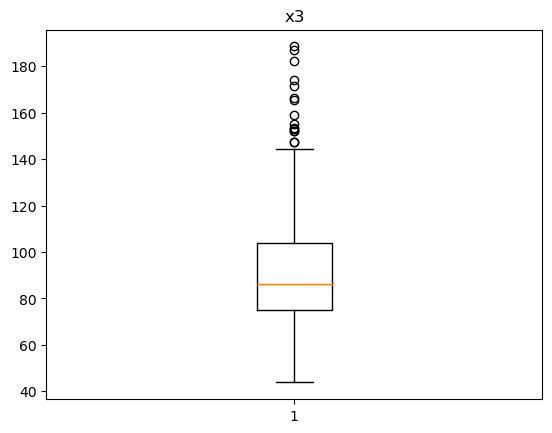

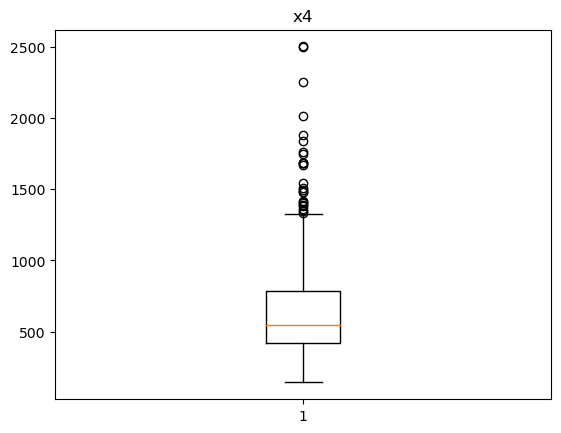

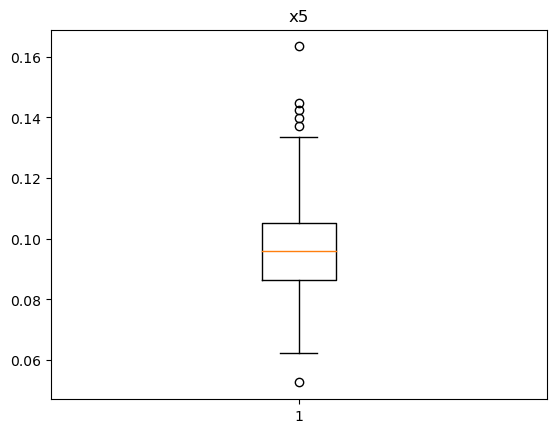

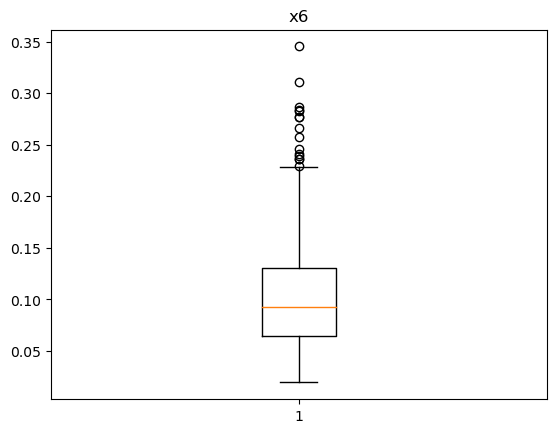

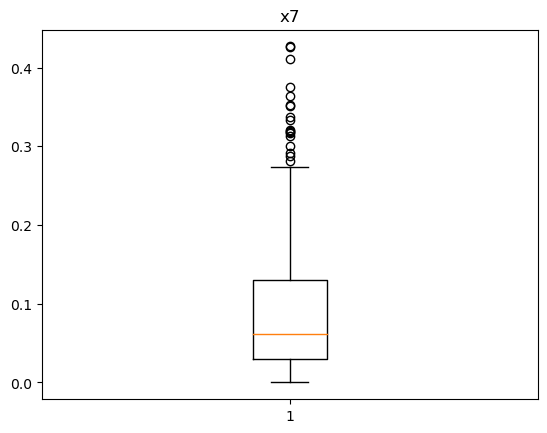

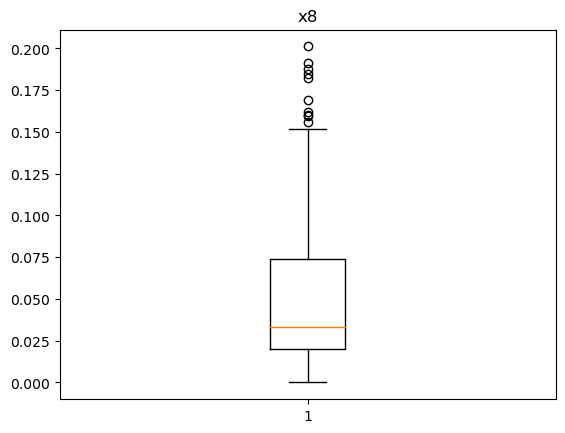

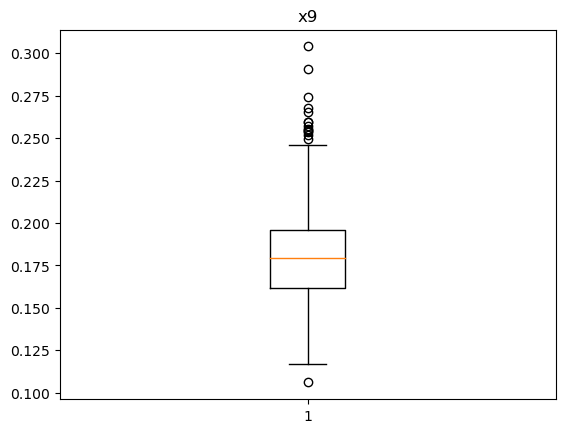

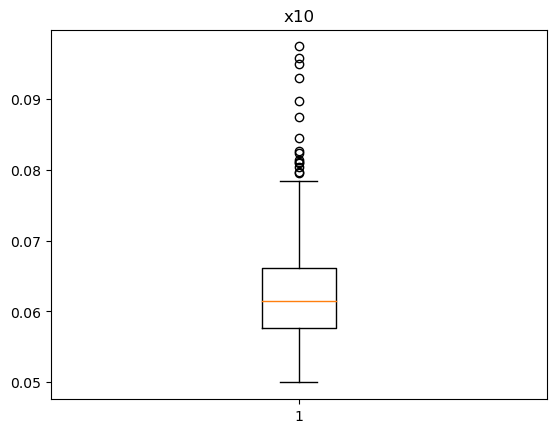

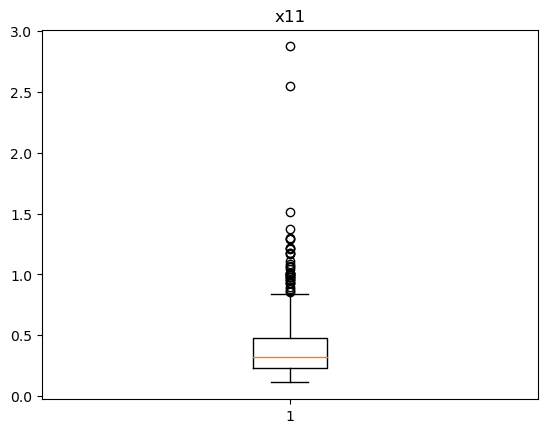

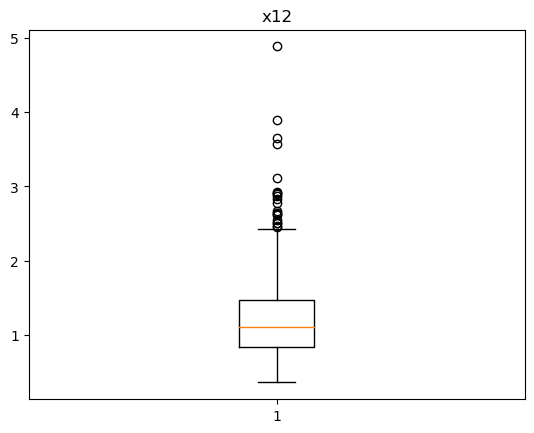

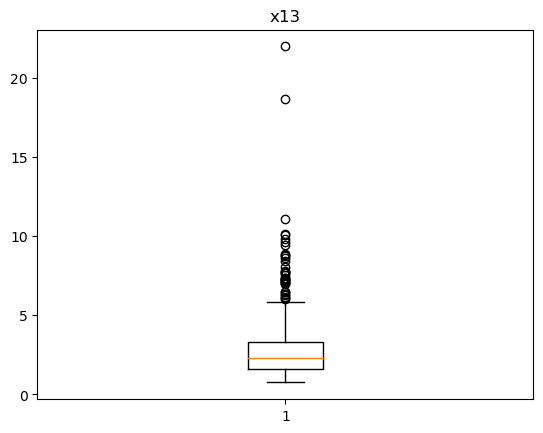

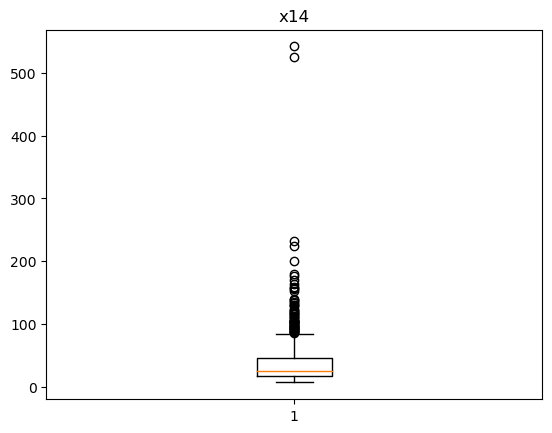

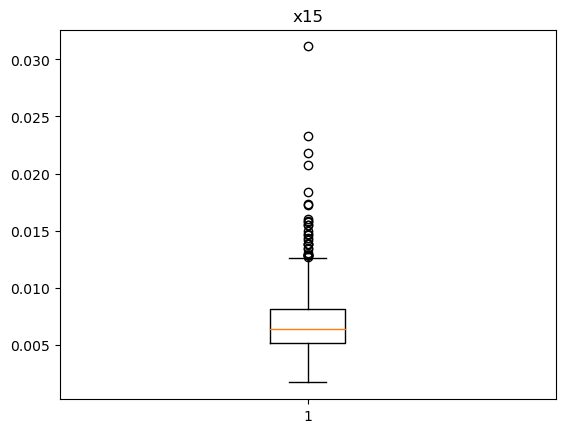

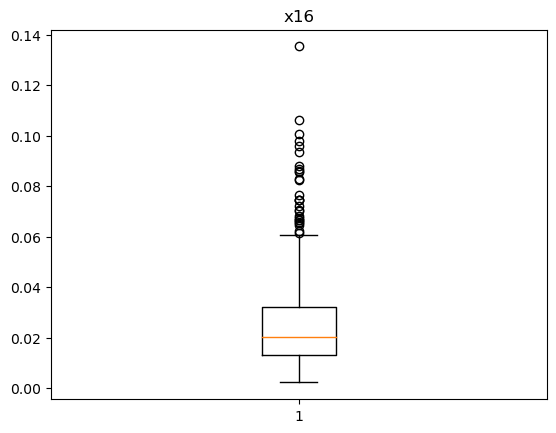

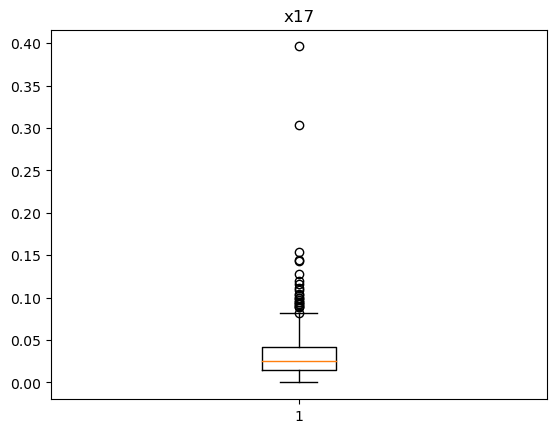

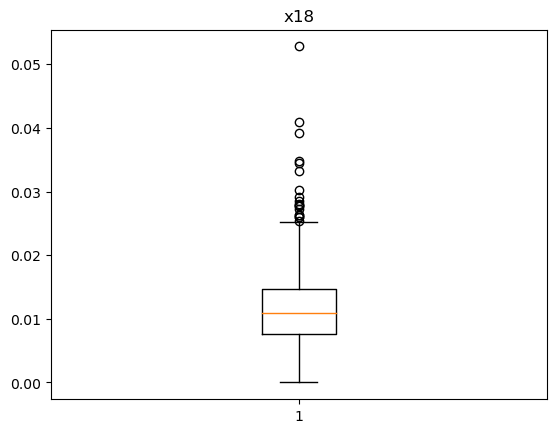

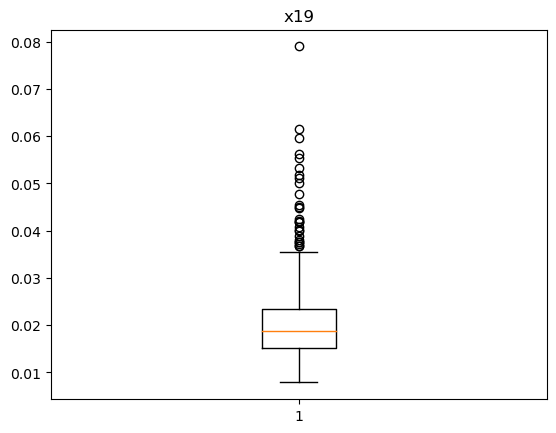

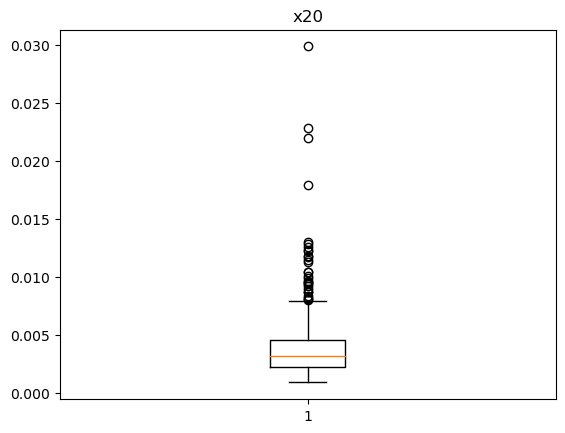

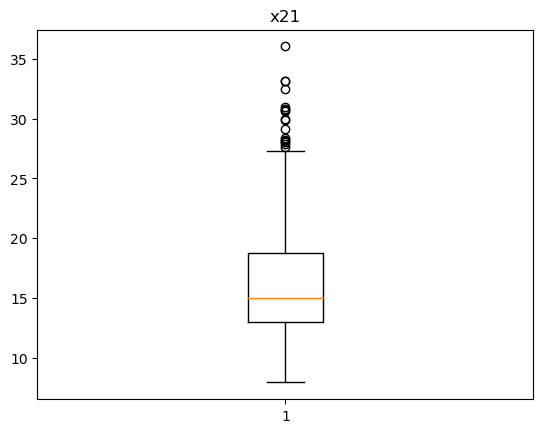

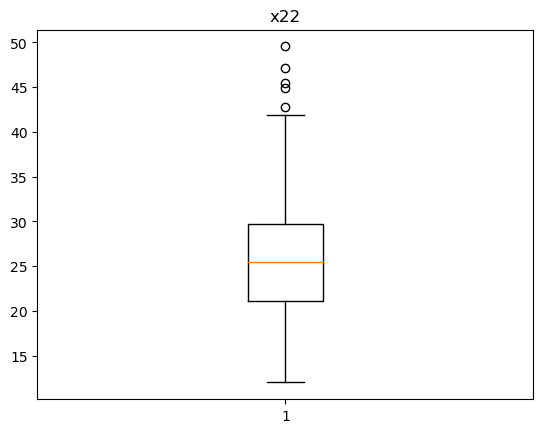

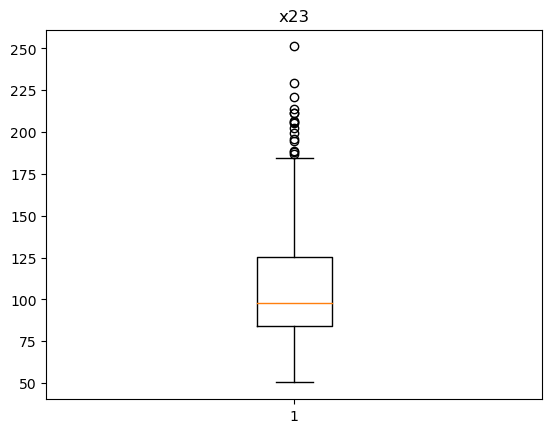

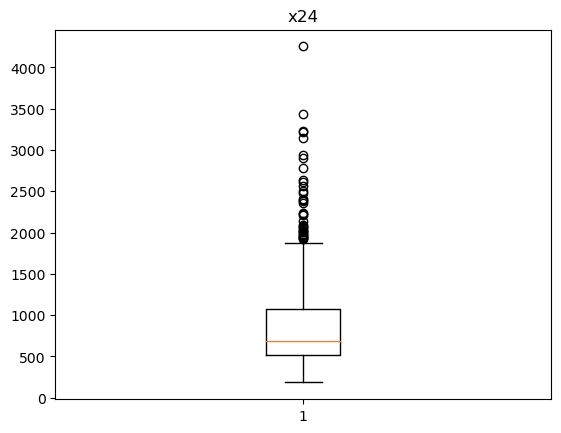

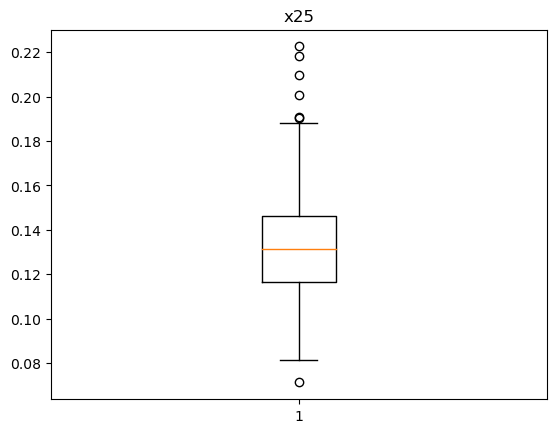

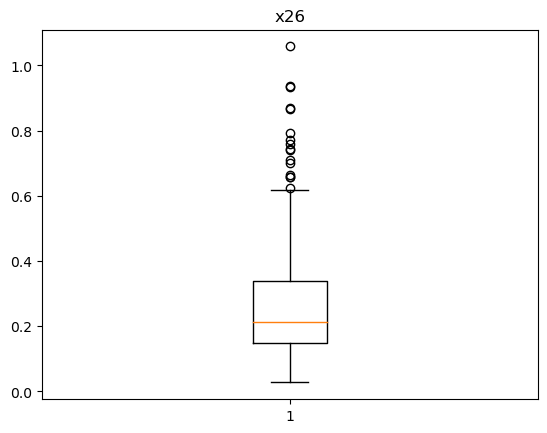

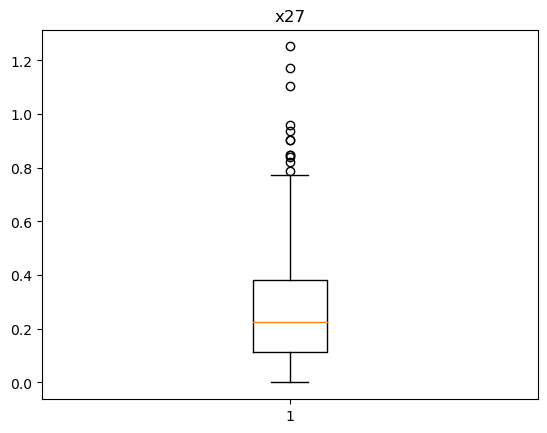

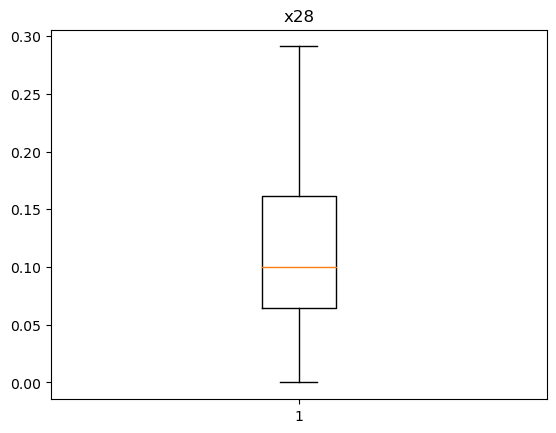

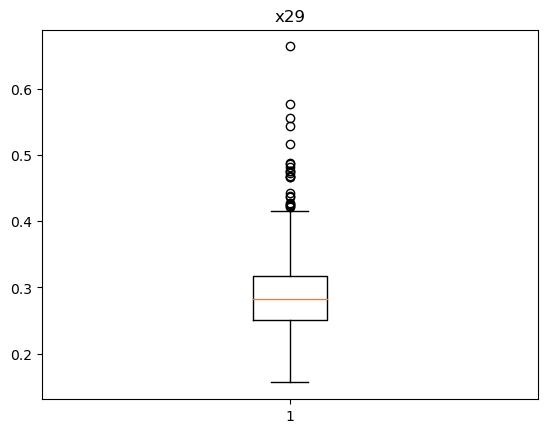

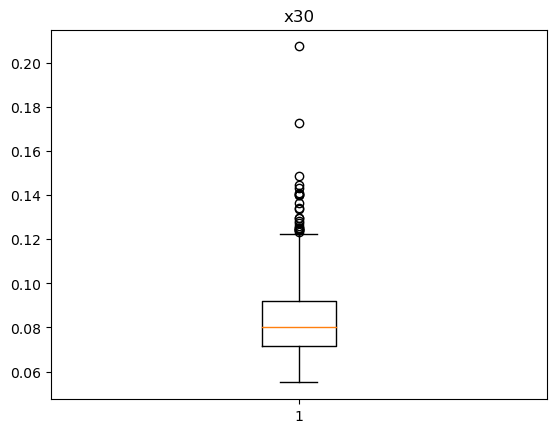

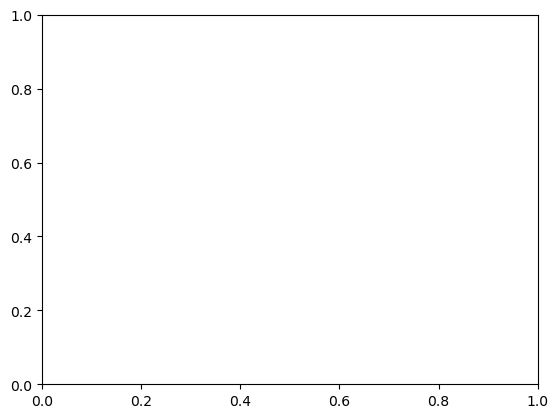

In [43]:
def generateBoxplots(df):
    for i in range(1,31):
        plot.boxplot(x=df['x'+str(i)])
        plot.title("x"+str(i))
        plot.subplots()
        
generateBoxplots(df)

Todas las columnas tienen datos atípicos exceptuando la columna `x28`

In [44]:
atypical_columns = df.drop(['ID','clas'], axis=1)
atypical_columns

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x22,x23,x24,x25,x26,x27,x28,x29,x30,clasN
0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
2,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
3,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
4,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.17910,0.52490,0.5355,0.1741,0.3985,0.12440,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
564,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
565,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
566,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [45]:
from scipy import stats
# Encontramos el Q1, Q3, y el rango intercuartílico para cada columna
Q1 = atypical_columns.quantile(q=.25)
Q3 = atypical_columns.quantile(q=.75)
IQR = atypical_columns.apply(stats.iqr)
# Solo mantenemos filas que esten dentro de 1.5*IQR de Q1 y Q3
df_clean = atypical_columns[~((atypical_columns < (Q1-1.5*IQR)) | (atypical_columns > (Q3+1.5*IQR))).any(axis=1)]
# Calculamos cuantas filas desaparecerian
df_clean

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x22,x23,x24,x25,x26,x27,x28,x29,x30,clasN
5,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368,0
6,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510,0
9,16.02,23.24,102.70,797.8,0.08206,0.06669,0.03299,0.03323,0.1528,0.05697,...,33.88,123.80,1150.0,0.1181,0.1551,0.1459,0.09975,0.2948,0.08452,0
10,15.78,17.89,103.60,781.0,0.09710,0.12920,0.09954,0.06606,0.1842,0.06082,...,27.28,136.50,1299.0,0.1396,0.5609,0.3965,0.18100,0.3792,0.10480,0
12,15.85,23.95,103.70,782.7,0.08401,0.10020,0.09938,0.05364,0.1847,0.05338,...,27.66,112.00,876.5,0.1131,0.1924,0.2322,0.11190,0.2809,0.06287,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553,12.88,28.92,82.50,514.3,0.08123,0.05824,0.06195,0.02343,0.1566,0.05708,...,35.74,88.84,595.7,0.1227,0.1620,0.2439,0.06493,0.2372,0.07242,1
554,10.29,27.61,65.67,321.4,0.09030,0.07658,0.05999,0.02738,0.1593,0.06127,...,34.91,69.57,357.6,0.1384,0.1710,0.2000,0.09127,0.2226,0.08283,1
557,14.59,22.68,96.39,657.1,0.08473,0.13300,0.10290,0.03736,0.1454,0.06147,...,27.27,105.90,733.5,0.1026,0.3171,0.3662,0.11050,0.2258,0.08004,1
559,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,0.1537,0.06171,...,33.17,100.20,706.7,0.1241,0.2264,0.1326,0.10480,0.2250,0.08321,1


In [46]:
171/568

0.301056338028169

Se puede observar que tras eliminar los datos atípicos resultan 397 registros, por lo que son: **171 registros datos atípicos** lo que representa el 30.1% de datos. No superan el 40% por lo cual se eliminan.

Para guardar los indices de los datos atípicos se hace lo siguiente

In [47]:
# Ahora mantenemos filas que esten fuera de 1.5*IQR de Q1 y Q3 
atypical_rows = atypical_columns[((atypical_columns < (Q1-1.5*IQR)) | (atypical_columns > (Q3+1.5*IQR))).any(axis=1)]
atypical_rows

atypical_index = atypical_rows.index.tolist()
atypical_index

[0,
 1,
 2,
 3,
 4,
 7,
 8,
 11,
 13,
 14,
 17,
 21,
 22,
 23,
 24,
 25,
 26,
 29,
 30,
 32,
 33,
 34,
 37,
 40,
 41,
 52,
 55,
 59,
 61,
 62,
 67,
 69,
 70,
 71,
 75,
 76,
 77,
 81,
 82,
 94,
 104,
 107,
 109,
 110,
 111,
 115,
 117,
 118,
 120,
 121,
 135,
 137,
 144,
 145,
 146,
 149,
 150,
 151,
 155,
 160,
 161,
 163,
 167,
 172,
 175,
 179,
 180,
 184,
 189,
 191,
 195,
 198,
 201,
 202,
 209,
 211,
 212,
 213,
 217,
 218,
 228,
 231,
 235,
 238,
 241,
 244,
 249,
 251,
 253,
 255,
 256,
 257,
 258,
 261,
 264,
 271,
 272,
 274,
 285,
 287,
 289,
 299,
 301,
 313,
 317,
 322,
 328,
 331,
 334,
 336,
 338,
 342,
 344,
 350,
 351,
 365,
 367,
 368,
 369,
 371,
 372,
 375,
 378,
 387,
 388,
 390,
 392,
 399,
 415,
 416,
 423,
 429,
 432,
 442,
 448,
 449,
 454,
 459,
 460,
 464,
 467,
 468,
 470,
 472,
 484,
 488,
 491,
 497,
 502,
 503,
 504,
 506,
 519,
 520,
 527,
 532,
 534,
 536,
 537,
 538,
 552,
 555,
 556,
 558,
 560,
 561,
 562,
 563,
 564,
 566,
 567]

### Relaciones entre variables

In [136]:
corr = df_clean.corr()
corr

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x22,x23,x24,x25,x26,x27,x28,x29,x30,clasN
x1,1.000000,0.281875,0.998118,0.992040,0.054485,0.443268,0.658477,0.756046,0.074692,-0.435614,...,0.274700,0.964936,0.957739,0.086091,0.417807,0.563724,0.683210,0.136717,-0.012256,-0.680438
x2,0.281875,1.000000,0.286830,0.289779,-0.046049,0.180578,0.295082,0.239135,0.052130,-0.112367,...,0.914682,0.317153,0.318817,0.071208,0.215288,0.273965,0.237771,0.078155,0.058770,-0.389751
x3,0.998118,0.286830,1.000000,0.990235,0.092502,0.493730,0.696614,0.786315,0.101557,-0.393039,...,0.281300,0.971605,0.959684,0.120305,0.462124,0.600085,0.713761,0.159385,0.030067,-0.695617
x4,0.992040,0.289779,0.990235,1.000000,0.057452,0.429607,0.665299,0.758590,0.076954,-0.422180,...,0.281816,0.962807,0.971030,0.101151,0.402038,0.560104,0.672670,0.135755,-0.012415,-0.697752
x5,0.054485,-0.046049,0.092502,0.057452,1.000000,0.676284,0.464362,0.523037,0.493524,0.618208,...,0.020862,0.146008,0.124548,0.803756,0.433780,0.372636,0.464787,0.375273,0.508695,-0.270941
x6,0.443268,0.180578,0.493730,0.429607,0.676284,1.000000,0.837560,0.805168,0.471631,0.478068,...,0.203598,0.544406,0.472445,0.590002,0.861938,0.780599,0.784441,0.425597,0.656944,-0.515286
x7,0.658477,0.295082,0.696614,0.665299,0.464362,0.837560,1.000000,0.930270,0.366293,0.161273,...,0.322965,0.737636,0.701477,0.491063,0.772921,0.904939,0.861985,0.364051,0.471493,-0.711026
x8,0.756046,0.239135,0.786315,0.758590,0.523037,0.805168,0.930270,1.000000,0.365860,0.081865,...,0.272725,0.816931,0.790938,0.509892,0.692537,0.794995,0.908279,0.361207,0.382057,-0.752618
x9,0.074692,0.052130,0.101557,0.076954,0.493524,0.471631,0.366293,0.365860,1.000000,0.323912,...,0.080152,0.148480,0.127825,0.380303,0.340956,0.292867,0.317342,0.675278,0.302373,-0.242816
x10,-0.435614,-0.112367,-0.393039,-0.422180,0.618208,0.478068,0.161273,0.081865,0.323912,1.000000,...,-0.082149,-0.321685,-0.350490,0.510008,0.344396,0.162413,0.088258,0.257781,0.724436,0.084990


Con la matriz de correlación, se puede ver que tan relacionadas, dos variables entre sí, por ejemplo: x1 esta relacionada con x3 en un `99.81%`

In [141]:
for i in range(1,31):
    nombre_c=('x'+str(i))
    print(nombre_c)
    print(corr[nombre_c].nlargest(3))
    print()

x1
x1    1.000000
x3    0.998118
x4    0.992040
Name: x1, dtype: float64

x2
x2     1.000000
x22    0.914682
x12    0.473651
Name: x2, dtype: float64

x3
x3    1.000000
x1    0.998118
x4    0.990235
Name: x3, dtype: float64

x4
x4    1.000000
x1    0.992040
x3    0.990235
Name: x4, dtype: float64

x5
x5     1.000000
x25    0.803756
x6     0.676284
Name: x5, dtype: float64

x6
x6     1.000000
x26    0.861938
x7     0.837560
Name: x6, dtype: float64

x7
x7     1.000000
x8     0.930270
x27    0.904939
Name: x7, dtype: float64

x8
x8     1.000000
x7     0.930270
x28    0.908279
Name: x8, dtype: float64

x9
x9     1.000000
x29    0.675278
x5     0.493524
Name: x9, dtype: float64

x10
x10    1.000000
x30    0.724436
x5     0.618208
Name: x10, dtype: float64

x11
x11    1.000000
x13    0.953029
x14    0.935498
Name: x11, dtype: float64

x12
x12    1.000000
x22    0.558981
x2     0.473651
Name: x12, dtype: float64

x13
x13    1.000000
x11    0.953029
x14    0.899008
Name: x13, dtype: float64



### Modelo de regresión logística

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score

In [50]:
def generarPrediccionesY(x_train, y_train, x_test):
    # entrenar
    # x = df[['x1','x2', 'x3']]
    # y = df['clas']
    modelo = LogisticRegression(max_iter=1000)
    modelo.fit(X=np.array(x_train), y=y_train)
    
    predicciones = modelo.predict(X=np.array(x_test))
    return predicciones

La idea es implementar esto pero con validación cruzada para obtener una predicción por cada subtest

In [51]:
# Por ejemplo

# Entrenar con 10
x_train = df_clean.iloc[0:10][['x1','x2']] 
y_train = df_clean.iloc[0:10]['clasN']

print(x_train)
print()
print(y_train)
print()

# Testear con 5
x_test = df_clean.iloc[10:15][['x1','x2']]
print(x_test)
print()

p = generarPrediccionesY(x_train, y_train, x_test)
print(p)

        x1     x2
5   18.250  19.98
6   13.710  20.83
9   16.020  23.24
10  15.780  17.89
12  15.850  23.95
15  14.680  20.13
16  16.130  20.68
18  13.540  14.36
19  13.080  15.71
20   9.504  12.44

5     0
6     0
9     0
10    0
12    0
15    0
16    0
18    1
19    1
20    1
Name: clasN, dtype: int32

       x1     x2
27  15.30  25.27
28  17.57  15.05
31  17.02  23.98
35  14.25  21.72
36  13.03  18.42

[0 0 0 0 0]


### Validación cruzada

Para garantizar la homogeneidad de las muestras se crea una copia del data frame pero revuelta aleatoriamente

In [52]:
df_shuffled = df_clean.sample(frac=1)
df_shuffled

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x22,x23,x24,x25,x26,x27,x28,x29,x30,clasN
227,12.62,23.97,81.35,496.4,0.07903,0.07529,0.05438,0.02036,0.1514,0.06019,...,31.31,90.67,624.0,0.12270,0.34540,0.39110,0.11800,0.2826,0.09585,1
443,18.03,16.85,117.50,990.0,0.08947,0.12320,0.10900,0.06254,0.1720,0.05780,...,22.02,133.30,1292.0,0.12630,0.26660,0.42900,0.15350,0.2842,0.08225,0
36,13.03,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.02923,0.1467,0.05863,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,1
540,14.47,24.99,95.81,656.4,0.08837,0.12300,0.10090,0.03890,0.1872,0.06341,...,31.73,113.50,808.9,0.13400,0.42020,0.40400,0.12050,0.3187,0.10230,1
252,17.30,17.08,113.00,928.2,0.10080,0.10410,0.12660,0.08353,0.1813,0.05613,...,25.09,130.90,1222.0,0.14160,0.24050,0.33780,0.18570,0.3138,0.08113,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,11.61,16.02,75.46,408.2,0.10880,0.11680,0.07097,0.04497,0.1886,0.06320,...,19.67,81.93,475.7,0.14150,0.21700,0.23020,0.11050,0.2787,0.07427,1
38,13.48,20.82,88.40,559.2,0.10160,0.12550,0.10630,0.05439,0.1720,0.06419,...,26.02,107.30,740.4,0.16100,0.42250,0.50300,0.22580,0.2807,0.10710,0
290,14.96,19.10,97.03,687.3,0.08992,0.09823,0.05940,0.04819,0.1879,0.05852,...,26.19,109.10,809.8,0.13130,0.30300,0.18040,0.14890,0.2962,0.08472,1
194,12.91,16.33,82.53,516.4,0.07941,0.05366,0.03873,0.02377,0.1829,0.05667,...,22.00,90.81,600.6,0.10970,0.15060,0.17640,0.08235,0.3024,0.06949,1


Sabiendo que tenemos un `k=10`, se debe dividir el dataset en 10 partes para hacer las 10 iteraciones. 

In [53]:
397/10

39.7

Como la división no es entera, se dividirá en 7 iteraciones de 40 y 3 de 39

In [54]:
(40*7)+(39*3)

397

In [117]:
def validacionCruzada(variables_entrada):
    rango_in = 0
    rango_fin = 40
    list_y_real = []
    list_y_pred = []
    for k in range(1,11): 
        #cada iteración de la validación cruzada se establece de un rango de 40 en 40
        df_test = df_shuffled.iloc[rango_in:rango_fin] # 40 datos de prueba

        # Usamos el método 'merge()' para obtener las filas que están en 'df_shuffled' pero no en 'df_test'
        diff_df = pd.merge(df_shuffled, df_test, how='outer', indicator=True)
        df_train = diff_df.loc[diff_df['_merge'] == 'left_only'].drop(columns='_merge')  #357 datos de entrenamiento
           
#         print(df_shuffled.iloc[i]['clasN'])
        x_train = df_train[variables_entrada]
        y_train = df_train['clasN']
        x_test = df_test[variables_entrada]
        
        y_real = df_test['clasN']
        y_pred = generarPrediccionesY(x_train, y_train, x_test)
               
        list_y_real += (list(y_real))
        list_y_pred += (list(y_pred))

        rango_in = rango_fin
        rango_fin = rango_fin+40 if k<=6 else rango_fin+39
        
    return(list_y_real, list_y_pred)
    


### Matriz de confusión

In [56]:
def mat_conf(vp,vn,fp,fn):
    # Creamos un dataframe vacío con 2 filas y 2 columnas
    df = pd.DataFrame(index=['Predice Enfermo', 'Predice Sano'], columns=['Real Enfermo', 'Real Sano'])

    # Llenamos la matriz con los datos
    df.loc['Predice Enfermo', 'Real Enfermo'] = vp
    df.loc['Predice Enfermo', 'Real Sano'] = fp
    df.loc['Predice Sano', 'Real Enfermo'] = fn
    df.loc['Predice Sano', 'Real Sano'] = vn
    
    return(df)


### Salidas de un modelo

In [85]:
def out_modelo(real, pred):
#     print((real))
#     print((pred))
    verdadero_positivo = 0
    verdadero_negativo = 0
    falso_positivo = 0
    falso_negativo = 0
    for i in range(len(real)):
        r = real[i] #real
        p = pred[i] #predecido

        if(r==1 and p==1): # benigno - benigno
            # Realmente está sano, y el algoritmo predijo que está sano
            verdadero_negativo += 1

        elif(r==0 and p==0): # maligno - maligno
            # Realmente está enfermo, y el algoritmo predijo que está enfermo
            verdadero_positivo += 1

        elif(r==0 and p==1): # maligno - benigno
            # Realmente está enfermo, pero el algoritmo predijo que está sano
            falso_negativo += 1

        elif(r==1 and p==0): # benigno - maligno
            # Realmente está sano, pero el algoritmo predijo que está enfermo
            falso_positivo += 1

    print("verdaderos positivos:", verdadero_positivo)
    print("verdaderos negativos:", verdadero_negativo)
    print("falsos positivos:", falso_positivo)
    print("falsos negativo:", falso_negativo)
    
    print()
    print("----------------------------------------------------------------")
    print()
    sensibilidad = -1
    especificidad = -1
    print("Sensibilidad")
    try:
        sensibilidad = verdadero_positivo/(verdadero_positivo+falso_negativo)
        print(sensibilidad)
    except ZeroDivisionError:
        print("División por cero")
    print()
    print("Especificidad")
    try:
        especificidad = verdadero_negativo/(verdadero_negativo+falso_positivo)
        print(especificidad)
    except ZeroDivisionError:
        print("División por cero")
    print()
    print("Precisión")
    try:
        print((verdadero_positivo/(verdadero_positivo+falso_positivo)))
    except ZeroDivisionError:
        print("División por cero")
    
    print()
    print("----------------------------------------------------------------")
    print()
    
    print("Porcentaje de correctas clasificaciones: (verdaderos/todos)")
    print((verdadero_positivo+verdadero_negativo)/(verdadero_positivo+verdadero_negativo+falso_positivo+falso_negativo))
    print()
    print("Porcentaje de malas clasificaciones: (falsos/todos)")
    print((falso_positivo+falso_negativo)/(verdadero_positivo+verdadero_negativo+falso_positivo+falso_negativo))
    
    print()
    print("----------------------------------------------------------------")
    print()
    
    print("MATRIZ DE CONFUSIÓN")
    
    a = mat_conf(verdadero_positivo,verdadero_negativo,falso_positivo,falso_negativo)
    print(a.head())
    print()
    
    return((sensibilidad, especificidad))
    
   

### Sensibilidad
VP/(VP+FN)

### Especificidad
VN/(VN+FP)

### Presición 
VP/(VP+FP)

### Generar curva ROC

Esta función fue un intento de crear la curva ROC desde cero, sin embargo, aunque los puntos estén, la linea que los une no es coherente, por tanto fue descartada.

In [103]:
import matplotlib.pyplot as plt
def curva_roc(list_x, list_y):

    # Creamos el gráfico de líneas
    plt.plot(list_x, list_y, marker='o', linestyle='--')

    # Personalizamos el gráfico con etiquetas y título
    plt.xlabel('1-Especificidad')
    plt.ylabel('Sensibilidad')
    plt.title('Curva ROC')

    # Mostramos el gráfico
    plt.show()


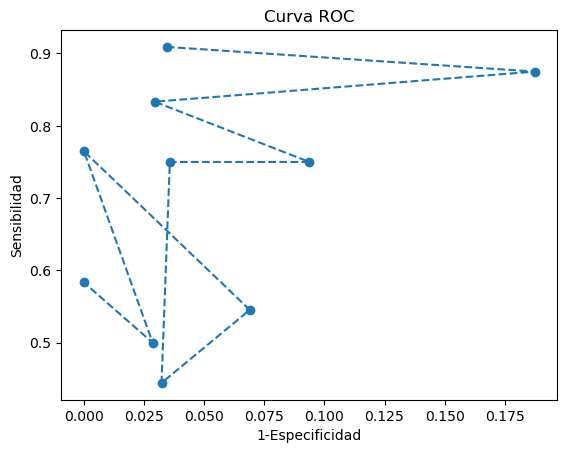

In [115]:
curva_roc(x_roc,y_roc) #ejemplo 

Esta es la función que realmente se mantiene para generar la curva roc, que es la que viene con sklearn

In [129]:
from sklearn.metrics import roc_curve
def curva_roc(y_true, y_pred):
    import matplotlib.pyplot as plt

    sorted_indices = sorted(range(len(y_pred)), key=lambda k: y_pred[k])
    y_true_sorted = [y_true[i] for i in sorted_indices]
    y_pred_sorted = [y_pred[i] for i in sorted_indices]

    # Calcular la curva ROC
    fpr, tpr, thresholds = roc_curve(y_true_sorted, y_pred_sorted)

    # Graficar la curva ROC
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Curva ROC')
    plt.show()

## MODELO 1

verdaderos positivos: 69
verdaderos negativos: 283
falsos positivos: 16
falsos negativo: 29

----------------------------------------------------------------

Sensibilidad
0.7040816326530612

Especificidad
0.9464882943143813

Precisión
0.8117647058823529

----------------------------------------------------------------

Porcentaje de correctas clasificaciones: (verdaderos/todos)
0.8866498740554156

Porcentaje de malas clasificaciones: (falsos/todos)
0.11335012594458438

----------------------------------------------------------------

MATRIZ DE CONFUSIÓN
                Real Enfermo Real Sano
Predice Enfermo           69        16
Predice Sano              29       283



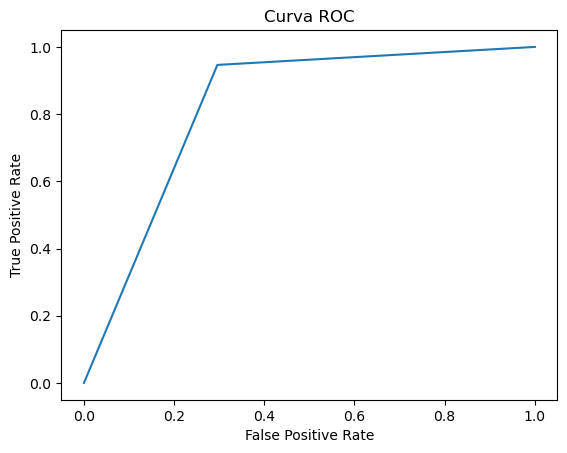

In [130]:
#Curva ROC
y_true, y_pred = validacionCruzada(['x1','x2'])
out_modelo(y_true,y_pred)
curva_roc(y_true,y_pred)

## MODELO 2

verdaderos positivos: 67
verdaderos negativos: 283
falsos positivos: 16
falsos negativo: 31

----------------------------------------------------------------

Sensibilidad
0.6836734693877551

Especificidad
0.9464882943143813

Precisión
0.8072289156626506

----------------------------------------------------------------

Porcentaje de correctas clasificaciones: (verdaderos/todos)
0.8816120906801007

Porcentaje de malas clasificaciones: (falsos/todos)
0.11838790931989925

----------------------------------------------------------------

MATRIZ DE CONFUSIÓN
                Real Enfermo Real Sano
Predice Enfermo           67        16
Predice Sano              31       283



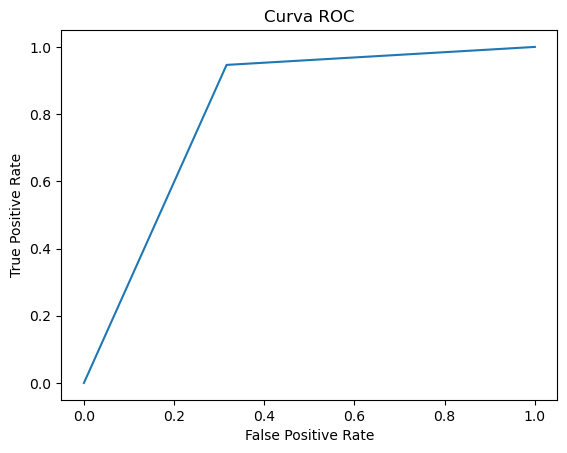

In [131]:
#Curva ROC
y_true, y_pred = validacionCruzada(['x3','x4','x5'])
out_modelo(y_true,y_pred)
curva_roc(y_true,y_pred)

## MODELO 3

verdaderos positivos: 23
verdaderos negativos: 294
falsos positivos: 5
falsos negativo: 75

----------------------------------------------------------------

Sensibilidad
0.23469387755102042

Especificidad
0.9832775919732442

Precisión
0.8214285714285714

----------------------------------------------------------------

Porcentaje de correctas clasificaciones: (verdaderos/todos)
0.7984886649874056

Porcentaje de malas clasificaciones: (falsos/todos)
0.20151133501259447

----------------------------------------------------------------

MATRIZ DE CONFUSIÓN
                Real Enfermo Real Sano
Predice Enfermo           23         5
Predice Sano              75       294



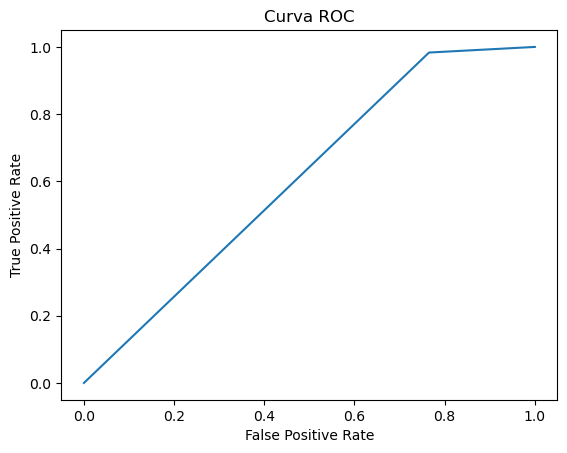

In [132]:
#Curva ROC
y_true, y_pred = validacionCruzada(['x11','x12'])
out_modelo(y_true,y_pred)
curva_roc(y_true,y_pred)

## MODELO 4

verdaderos positivos: 0
verdaderos negativos: 299
falsos positivos: 0
falsos negativo: 98

----------------------------------------------------------------

Sensibilidad
0.0

Especificidad
1.0

Precisión
División por cero

----------------------------------------------------------------

Porcentaje de correctas clasificaciones: (verdaderos/todos)
0.7531486146095718

Porcentaje de malas clasificaciones: (falsos/todos)
0.24685138539042822

----------------------------------------------------------------

MATRIZ DE CONFUSIÓN
                Real Enfermo Real Sano
Predice Enfermo            0         0
Predice Sano              98       299



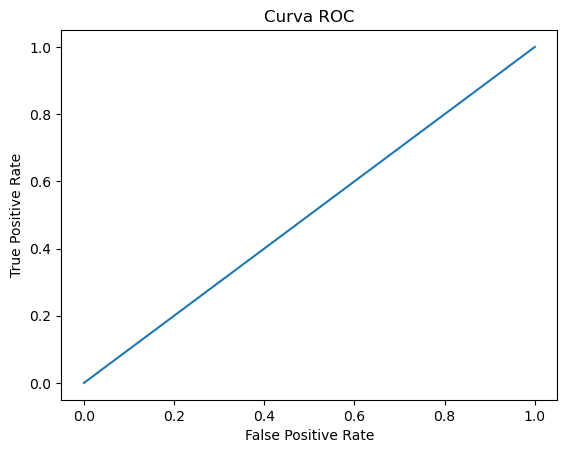

In [133]:
#Curva ROC
y_true, y_pred = validacionCruzada(['x28','x29','x30'])
out_modelo(y_true,y_pred)
curva_roc(y_true,y_pred)

## MODELO 5

Las variables más relacionadas a `x1` según la matriz de correlación son `x3, x4, x21, x23 y x24`, por tanto se generará un modelo con todas estas

verdaderos positivos: 82
verdaderos negativos: 289
falsos positivos: 10
falsos negativo: 16

----------------------------------------------------------------

Sensibilidad
0.8367346938775511

Especificidad
0.9665551839464883

Precisión
0.8913043478260869

----------------------------------------------------------------

Porcentaje de correctas clasificaciones: (verdaderos/todos)
0.9345088161209067

Porcentaje de malas clasificaciones: (falsos/todos)
0.0654911838790932

----------------------------------------------------------------

MATRIZ DE CONFUSIÓN
                Real Enfermo Real Sano
Predice Enfermo           82        10
Predice Sano              16       289



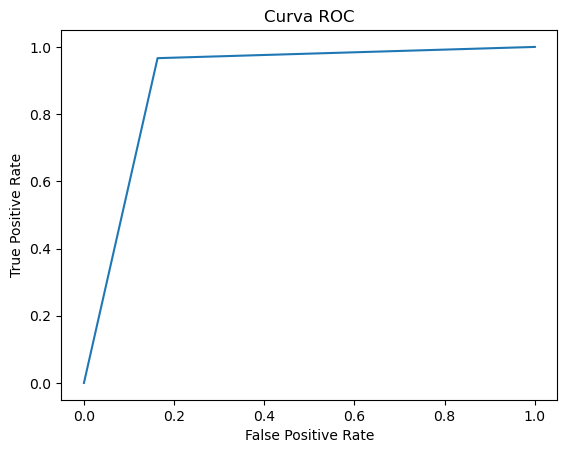

In [134]:
#Curva ROC
y_true, y_pred = validacionCruzada(['x1','x3','x4','x21','x23','x24'])
out_modelo(y_true,y_pred)
curva_roc(y_true,y_pred)

## MODELO 6

Se usarán las variables más relacionadas a `x1` como en el modelo anterior, pero solo tres de ellas para ver la diferencia `x3, x4`

verdaderos positivos: 67
verdaderos negativos: 285
falsos positivos: 14
falsos negativo: 31

----------------------------------------------------------------

Sensibilidad
0.6836734693877551

Especificidad
0.9531772575250836

Precisión
0.8271604938271605

----------------------------------------------------------------

Porcentaje de correctas clasificaciones: (verdaderos/todos)
0.8866498740554156

Porcentaje de malas clasificaciones: (falsos/todos)
0.11335012594458438

----------------------------------------------------------------

MATRIZ DE CONFUSIÓN
                Real Enfermo Real Sano
Predice Enfermo           67        14
Predice Sano              31       285



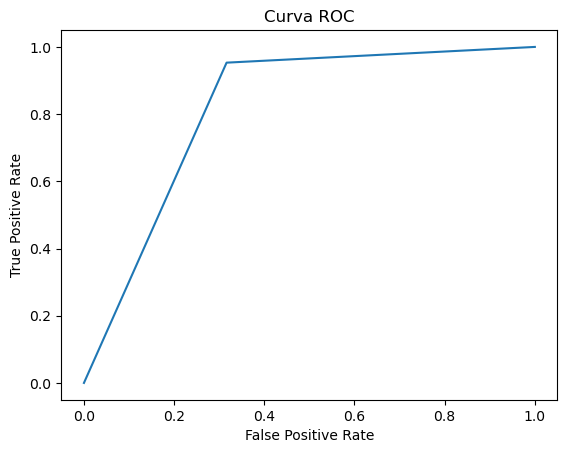

In [135]:
#Curva ROC
y_true, y_pred = validacionCruzada(['x1','x3','x4'])
out_modelo(y_true,y_pred)
curva_roc(y_true,y_pred)

## MODELO 7

Se usarán las variables más relacionadas a `x21` como en el modelo anterior, que son `x23, x24`

verdaderos positivos: 74
verdaderos negativos: 288
falsos positivos: 11
falsos negativo: 24

----------------------------------------------------------------

Sensibilidad
0.7551020408163265

Especificidad
0.9632107023411371

Precisión
0.8705882352941177

----------------------------------------------------------------

Porcentaje de correctas clasificaciones: (verdaderos/todos)
0.9118387909319899

Porcentaje de malas clasificaciones: (falsos/todos)
0.08816120906801007

----------------------------------------------------------------

MATRIZ DE CONFUSIÓN
                Real Enfermo Real Sano
Predice Enfermo           74        11
Predice Sano              24       288



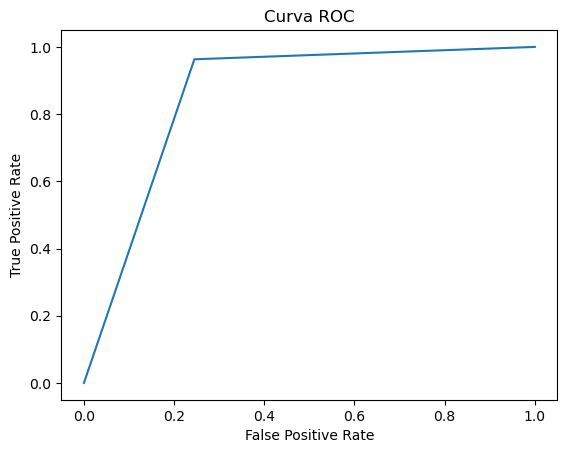

In [142]:
#Curva ROC
y_true, y_pred = validacionCruzada(['x21','x23','x24'])
out_modelo(y_true,y_pred)
curva_roc(y_true,y_pred)